# U.S Nutrient Database
The dataset, U.S. Nutrient Database, includes the nutrient data from the national survey What We Eat In
America, National Health and Nutrition Review Survey (WWEIA, NHANES), for determining dietary intakes.
U.S. Nutrient data have historically been used for national nutrition monitoring

Earlier databases were composed mainly of commodity-type items such as wheat flour, sugar, milk, etc.
However, with increased consumption of commercial processed and restaurant foods and changes in how
national nutrition monitoring data are used, many commercial processed and restaurant items have been
added to the database.

#### Problem Statement:
The increase of commercial commodities and fancy foods may create an imbalance in the nutrition of
Americans. Hence the Department of Agriculture decides to maintain balance by finding out the right nutrition
from the dataset. As the features are more,  by applying
some of the Machine Learning techniques such as PCA and Kmeans clustering to reduce the components
and visually analyze them

Dataset Description:
The Dataset consist of 8618 rows and 45 columns, some of the major column descriptions are given below,

FoodGroup- Category the food products belongs to

ShortDescrip- Brief Description about the food group

CommonName- Common name of the food

ScientificName- Scientific name of the food

Energy_kcal- Energy produced by food in calories

Protein_g- Protein intake in grams

Fat_g- Fat intake in grams

Carb_g- Carbohydrates intake in grams

Sugar_g- Sugar intake in grams

Fiber_g- Fiber intake in grams

VitA_mcg VitB6_mg VitB12_mcg VitC_mg VitE_mg- Different vitamins intake in milligrams

Calcium_mg- Calcium intake in milligrmas

Iron_mg- Iron intake in milligrams


#### Topics Covered:
PCA , 
Kmeans


In [4]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#### Import and pre-process the data

In [64]:
nutrients=pd.read_csv('USA_Nutrition_Data.csv')
nutrients.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [65]:
nutrients.shape

(8618, 45)

In [66]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [67]:
used = []
corrs = []
# The enumerate() function assigns an index to each item in an iterable object that can be used to reference the item later
for i, j in enumerate(nutrients.corr().columns):
    for k in range(len(nutrients.corr())):
        if ((nutrients.corr().iloc[k, i] > 0.9) &
            (j not in used) &
            (j != nutrients.corr().index[k])):
            used.append(j)
            corrs.append((j, nutrients.corr().index[k],
                np.round(nutrients.corr().iloc[k, i], 2)))
corrs_nutrients = pd.DataFrame([[i[0] for i in corrs],
                                [i[1] for i in corrs],
                                [i[2] for i in corrs]])
corrs_nutrients = corrs_nutrients.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrs_nutrients[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1.0
1,VitB6_mg,VitB6_USRDA,1.0
2,VitB12_mcg,VitB12_USRDA,1.0
3,VitC_mg,VitC_USRDA,1.0
4,VitE_mg,VitE_USRDA,1.0
5,Folate_mcg,Folate_USRDA,1.0
6,Niacin_mg,Niacin_USRDA,1.0
7,Riboflavin_mg,Riboflavin_USRDA,1.0
8,Thiamin_mg,Thiamin_USRDA,1.0
9,Calcium_mg,Calcium_USRDA,1.0


We can observe that the "_USRDA" features are similar to other nutrient features, and can be dropped


In [68]:
# dropping _USRDA features
nutrients.drop(nutrients.columns[nutrients.columns.str.contains('_USRDA')].values,inplace=True, axis=1)

Dropping first six categorical features as PCA and kmeans clustering does not affect them much

In [69]:
# dropping the categorical features as well
nutrients.set_index('ID', inplace=True)
nutrients_desc = nutrients.iloc[:, :6]
nutrients.drop(nutrients.columns[:6].values, axis=1, inplace=True)

need to perform Scaling before applying PCA since PCA creates the Principal Component 1 in the
direction of the maximum variance. But, if we do not scale, some features in our dataset might show high variance because of their larger values.

This is why it is strongly advisable to scale the data before applying PCA technique.

StandardScaler() will normalize each column of the dataset INDIVIDUALLY, so that each column or feature or variable will have mean = 0 and standard deviation = 1.

In [70]:
# standardizing the data
nutrients_TF = StandardScaler().fit_transform(nutrients)

In [71]:
# printing the shape of the data
nutrients_TF.shape

(8618, 23)

#### Fit and transform the data on the PCA model

In [72]:
pca = PCA()
pca.fit_transform(nutrients_TF)

array([[-1.12177585e+00, -1.18225141e+00, -3.66193973e+00, ...,
         2.08470136e-01, -3.98100905e-02,  3.70138174e-02],
       [-1.11468691e+00, -1.18417302e+00, -3.66232928e+00, ...,
         2.22450074e-01, -3.76157809e-02,  3.68193054e-02],
       [-9.94919411e-01, -1.57357953e+00, -4.69772411e+00, ...,
         2.38667900e-01, -7.22173197e-02,  4.31958958e-02],
       ...,
       [-7.67670698e-01, -3.26765632e+00,  9.85205562e-01, ...,
         3.64559090e-01, -1.48468056e-01,  8.65889021e-02],
       [ 3.55897094e-01,  6.78435359e-01, -1.00293556e+00, ...,
        -8.24537105e-01,  1.12523136e-01, -4.86965696e-02],
       [-8.66889802e-01,  1.19845904e+00,  1.93486895e-01, ...,
        -1.53381540e-01,  2.30499506e-01, -1.91554534e-03]])

#### Calculate the variance ratio and plot scree plot to find the principal components

In [73]:
pca.explained_variance_ratio_

array([2.36925468e-01, 1.13846015e-01, 8.83433734e-02, 8.17013669e-02,
       7.11161480e-02, 4.95813332e-02, 4.61246638e-02, 4.02719041e-02,
       3.74790508e-02, 3.58559322e-02, 3.17927198e-02, 2.59519549e-02,
       2.21153503e-02, 2.04113766e-02, 1.77385355e-02, 1.46927827e-02,
       1.43290735e-02, 1.39668837e-02, 1.11392349e-02, 1.03538827e-02,
       9.18082227e-03, 6.91711649e-03, 1.65010749e-04])

Text(0, 0.5, 'cumulative explained variance')

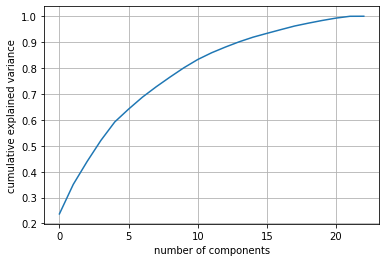

In [74]:
pca = PCA().fit(nutrients_TF)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From above, we can observe that the explained variance ratio after 10 is negligible

#### Fit and transform the PCA model for the principal components found

In [75]:
pca=PCA(n_components=10)
pca.fit(nutrients_TF)

PCA(n_components=10)

In [76]:
scores_pca=pca.transform(nutrients_TF)

In [77]:
print(pca.explained_variance_ratio_[:10].sum())

0.8012447255314572


We can observe that first 5 eigenvectors account for almost 60% of the variance

#### Create a Kmeans model for the PCA components


In [78]:
#Set a 10 KMeans clustering
from sklearn.cluster import KMeans
kmeans_pca=KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_pca.fit(nutrients_TF)

KMeans(n_clusters=10, random_state=42)

#### Add the components and the clusters found by PCA and Kmeans
to the scaled data

In [79]:
nutrients_seg_pca_kmeans=pd.concat([nutrients.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
nutrients_seg_pca_kmeans.columns.values[-10: ]=['Component1','Component2','Component3',
                                                'Component4','Component5','Component6',
                                                'Component7','Component8','Component9','Component10']
nutrients_seg_pca_kmeans['segment_kmeans_pca']=kmeans_pca.labels_
nutrients_seg_pca_kmeans.head()


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,segment_kmeans_pca
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,...,-1.182250,-3.661946,1.080911,-3.084151,0.837855,0.330918,-0.555152,-0.621221,1.426256,2
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,...,-1.184172,-3.662336,1.090730,-3.077420,0.836938,0.323280,-0.552157,-0.631270,1.432194,2
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,...,-1.573578,-4.697731,1.317303,-3.912673,0.940033,0.373758,-0.538780,-0.698496,1.763501,2
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,...,0.566071,-1.905064,-0.834522,0.438118,0.051321,1.708811,-1.160897,-0.396047,0.275184,0
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,...,0.537660,-2.307578,-0.903863,0.875478,0.014294,2.157794,-1.460661,-0.483999,0.282584,0


#### Visualize the components (1 and 2) based on its kmeans cluster

In [80]:
nutrients_seg_pca_kmeans['Segment']= nutrients_seg_pca_kmeans['segment_kmeans_pca'].map({0:'first',
                                                                                         1:'second',
                                                                                         2:'third',
                                                                                         3:'fourth',
                                                                                         4:'fifth'})

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


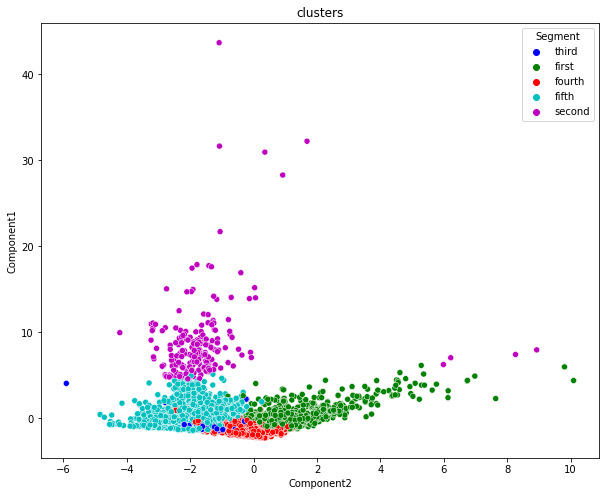

In [81]:
import seaborn as sns
x_axis= nutrients_seg_pca_kmeans['Component2']
y_axis= nutrients_seg_pca_kmeans['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=nutrients_seg_pca_kmeans['Segment'],palette=['b','g','r','c','m'])
plt.title('clusters')
plt.show()


As we can see we have five different clusters based on components 1 and 2.
But we can further analyze for rest of the components by sorting them to find what nutrients each component
is rich in

#### Find out which nutrient(s) is each component rich in

In [82]:
vects = pca.components_[:10]
first = pd.Series(vects[0], index=nutrients.columns)
first.sort_values(ascending=False)


Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241348
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
Protein_g        0.140620
VitE_mg          0.137122
VitA_mcg         0.133519
Manganese_mg     0.093567
Selenium_mcg     0.092319
VitC_mg          0.087639
Sugar_g          0.076323
Fat_g            0.033008
dtype: float64

First component is rich in Riboflavin_mg, Niacin_mg and VitB6

In [83]:
second = pd.Series(vects[1], index=nutrients.columns)
second.sort_values(ascending=False)

VitB12_mcg       0.355044
Protein_g        0.343396
Selenium_mcg     0.239322
VitA_mcg         0.236470
Copper_mcg       0.212669
Zinc_mg          0.177798
Manganese_mg     0.088783
Phosphorus_mg    0.087447
Niacin_mg        0.084803
Riboflavin_mg    0.073474
VitB6_mg         0.021128
VitC_mg         -0.038526
Thiamin_mg      -0.075152
Iron_mg         -0.093814
Folate_mcg      -0.097094
Magnesium_mg    -0.103360
Calcium_mg      -0.105172
VitE_mg         -0.106372
Fat_g           -0.111670
Fiber_g         -0.257732
Energy_kcal     -0.273449
Sugar_g         -0.358769
Carb_g          -0.443417
dtype: float64

Second component is rich in VitaminB12 and Protein


In [84]:
third = pd.Series(vects[2], index=nutrients.columns)
third.sort_values(ascending=False)

Folate_mcg       0.230987
Riboflavin_mg    0.192084
Thiamin_mg       0.184360
VitB6_mg         0.174650
Niacin_mg        0.164880
VitC_mg          0.162307
Iron_mg          0.087116
Sugar_g          0.055245
Carb_g           0.049825
VitB12_mcg      -0.012758
VitA_mcg        -0.021929
Zinc_mg         -0.038640
Fiber_g         -0.040400
Manganese_mg    -0.072630
Calcium_mg      -0.128141
Copper_mcg      -0.152260
Selenium_mcg    -0.163361
Magnesium_mg    -0.201231
VitE_mg         -0.207329
Protein_g       -0.213564
Phosphorus_mg   -0.274811
Energy_kcal     -0.462005
Fat_g           -0.534053
dtype: float64

Third component is rich in Folate, Riboflavin and Thiamin


In [85]:
fourth = pd.Series(vects[3], index=nutrients.columns)
fourth.sort_values(ascending=False)

VitA_mcg         0.530396
Copper_mcg       0.389932
VitB12_mcg       0.346553
Manganese_mg     0.311369
Sugar_g          0.217371
Carb_g           0.174111
Energy_kcal      0.052282
VitC_mg          0.047590
Riboflavin_mg    0.046977
Fiber_g          0.042127
Fat_g            0.026518
VitE_mg          0.026177
Folate_mcg      -0.032478
Iron_mg         -0.059435
Magnesium_mg    -0.071812
Calcium_mg      -0.099342
Thiamin_mg      -0.103507
VitB6_mg        -0.114372
Niacin_mg       -0.156397
Selenium_mcg    -0.161623
Zinc_mg         -0.166324
Phosphorus_mg   -0.207867
Protein_g       -0.311108
dtype: float64

Fourth component is rich in Vitamin-A, copper and Vitamin-B12


In [86]:
fifth = pd.Series(vects[4], index=nutrients.columns)
fifth.sort_values(ascending=False)

Calcium_mg       0.388697
Magnesium_mg     0.352751
Phosphorus_mg    0.344923
Fiber_g          0.332167
Copper_mcg       0.161237
Manganese_mg     0.125600
Iron_mg          0.097098
Carb_g           0.082717
VitC_mg          0.024706
Protein_g        0.013170
VitA_mcg         0.008136
Selenium_mcg    -0.005050
Sugar_g         -0.048417
VitB12_mcg      -0.058859
Zinc_mg         -0.064317
VitB6_mg        -0.133753
Folate_mcg      -0.137700
Riboflavin_mg   -0.153441
Thiamin_mg      -0.161535
Niacin_mg       -0.203418
VitE_mg         -0.238023
Energy_kcal     -0.293598
Fat_g           -0.394447
dtype: float64

Fifth Component is rich in Calcium, Magnesium and Phosphorus

In [87]:
sixth = pd.Series(vects[5], index=nutrients.columns)
sixth.sort_values(ascending=False)

VitC_mg          0.545334
VitE_mg          0.475372
VitB6_mg         0.200625
Manganese_mg     0.182532
Magnesium_mg     0.139977
Fiber_g          0.134776
Fat_g            0.116429
Calcium_mg       0.070443
VitA_mcg         0.039050
Niacin_mg        0.026028
Iron_mg         -0.030323
Riboflavin_mg   -0.051090
Zinc_mg         -0.054572
Folate_mcg      -0.054630
Phosphorus_mg   -0.083693
Copper_mcg      -0.086151
VitB12_mcg      -0.123110
Thiamin_mg      -0.129741
Energy_kcal     -0.132831
Protein_g       -0.141373
Selenium_mcg    -0.243766
Carb_g          -0.279279
Sugar_g         -0.337090
dtype: float64

Sixth component is rich in VitC_mg, VitE_mg, VitB6_mg


In [88]:
seventh = pd.Series(vects[6], index=nutrients.columns)
seventh.sort_values(ascending=False)

Calcium_mg       0.462748
VitC_mg          0.451417
Phosphorus_mg    0.323626
Sugar_g          0.298544
Riboflavin_mg    0.141402
VitA_mcg         0.101366
Energy_kcal      0.066855
VitB12_mcg       0.056126
Niacin_mg        0.045504
Fat_g            0.045257
VitB6_mg         0.024761
Carb_g           0.022164
Protein_g        0.006391
Selenium_mcg    -0.021890
Thiamin_mg      -0.071578
Zinc_mg         -0.105967
Copper_mcg      -0.119140
VitE_mg         -0.125353
Folate_mcg      -0.130867
Iron_mg         -0.133098
Manganese_mg    -0.136504
Magnesium_mg    -0.269770
Fiber_g         -0.414826
dtype: float64

Seventh component is rich in Calcium_mg, VitC_mg and Phosphorus_mg


In [89]:
eighth = pd.Series(vects[7], index=nutrients.columns)
eighth.sort_values(ascending=False)


VitC_mg          0.516205
Selenium_mcg     0.410384
Magnesium_mg     0.191267
Copper_mcg       0.188080
Fiber_g          0.187635
Carb_g           0.155243
Sugar_g          0.143390
Protein_g        0.116465
VitB6_mg         0.083375
Energy_kcal      0.074468
Zinc_mg          0.033880
Niacin_mg        0.010169
VitB12_mcg       0.004602
Riboflavin_mg   -0.045386
VitA_mcg        -0.046183
Fat_g           -0.049695
Iron_mg         -0.107183
VitE_mg         -0.148417
Folate_mcg      -0.162065
Phosphorus_mg   -0.170066
Thiamin_mg      -0.189999
Manganese_mg    -0.345991
Calcium_mg      -0.367130
dtype: float64

Eighth component is rich in VitC_mg, Selenium_mcg and Magnesium_mg


In [90]:
ninth = pd.Series(vects[8], index=nutrients.columns)
ninth.sort_values(ascending=False)

Manganese_mg     0.757039
Selenium_mcg     0.358474
Sugar_g          0.150959
Protein_g        0.148716
Niacin_mg        0.120391
Carb_g           0.118090
VitC_mg          0.085965
Energy_kcal      0.041646
Magnesium_mg     0.031072
Thiamin_mg       0.027402
VitB6_mg         0.023147
Phosphorus_mg   -0.012285
VitA_mcg        -0.021915
Riboflavin_mg   -0.045971
VitE_mg         -0.061635
Folate_mcg      -0.063954
Fiber_g         -0.066009
Fat_g           -0.091781
Iron_mg         -0.108195
Zinc_mg         -0.109019
VitB12_mcg      -0.132002
Calcium_mg      -0.136126
Copper_mcg      -0.361534
dtype: float64

Ninth component is rich in Manganese_mg, Selenium_mcg and Sugar_g


In [91]:
tenth = pd.Series(vects[9], index=nutrients.columns)
tenth.sort_values(ascending=False)

Thiamin_mg       0.438476
Fat_g            0.200685
Riboflavin_mg    0.195187
VitC_mg          0.155517
Energy_kcal      0.141097
VitA_mcg         0.118091
Magnesium_mg     0.110719
Niacin_mg        0.088143
Fiber_g          0.086540
Phosphorus_mg    0.061666
Copper_mcg       0.047047
Protein_g        0.018369
Folate_mcg       0.017557
Manganese_mg    -0.018185
Carb_g          -0.043963
Selenium_mcg    -0.075568
Calcium_mg      -0.080259
Iron_mg         -0.083180
VitB12_mcg      -0.133194
VitB6_mg        -0.198043
Sugar_g         -0.388029
VitE_mg         -0.424214
Zinc_mg         -0.477837
dtype: float64

Tenth component is rich in Thiamin_mg, Fat_g and Riboflavin_mg


Inference:
Now instead of going through all the features in the dataset. Nutritionist from the Department of Agriculture
can go through these five components and create a new nutrition plan for Americans